<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Read_text_in_an_image_with_OCR_and_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extract text from an image with Tesseract

In [1]:
#Install opencv
!pip install opencv-contrib-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
#Install Tesseract
!sudo apt install tesseract-ocr
!pip install pytesseract

#install spanish tesseract
!sudo apt-get install tesseract-ocr-spa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-spa
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 951 kB of archives.
After this operation, 2,309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 t

In [34]:
#install plotly
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
#import necessary libraries
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import plotly.express as express
import numpy

In [9]:
#load image
!wget "https://images.unsplash.com/photo-1553268107-a74f013ceb59?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=399&q=80"

--2022-12-19 16:58:18--  https://images.unsplash.com/photo-1553268107-a74f013ceb59?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=399&q=80
Resolving images.unsplash.com (images.unsplash.com)... 146.75.38.208, 2a04:4e42:77::720
Connecting to images.unsplash.com (images.unsplash.com)|146.75.38.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36607 (36K) [image/jpeg]
Saving to: ‘photo-1553268107-a74f013ceb59?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=399&q=80’

photo-1553268107-a7 100%[===================>]  35.75K  --.-KB/s    in 0s      

2022-12-19 16:58:19 (85.1 MB/s) - ‘photo-1553268107-a74f013ceb59?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=399&q=80’ saved [36607/36607]



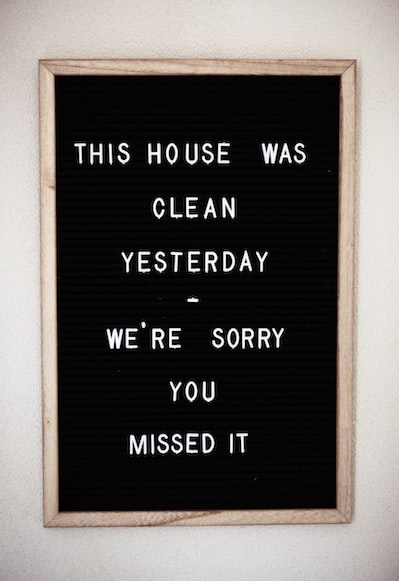

In [11]:
image = cv2.imread("photo-1553268107-a74f013ceb59?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=399&q=80")
cv2_imshow(image)

In [12]:
#Use pytesseract to read text in image
text = pytesseract.image_to_string(image)
print(text)

THIS HOUSE WAS
tae Y
aay

Tae Aad
You
NSS = me

 



In [13]:
#Identify location of text
boxes = pytesseract.image_to_boxes(image)
print(boxes)

T 74 417 84 438 0
H 90 417 100 438 0
I 109 416 112 438 0
S 118 417 130 438 0
H 148 417 161 438 0
O 166 416 178 438 0
U 186 416 195 438 0
S 202 417 211 438 0
E 218 417 230 439 0
W 262 417 267 438 0
A 267 417 278 438 0
S 283 417 306 438 0
t 153 362 165 383 0
a 173 362 183 384 0
e 188 363 198 384 0
Y 204 362 235 384 0
a 121 309 127 329 0
a 127 309 133 329 0
y 140 308 268 331 0
T 107 232 123 253 0
a 126 232 178 259 0
e 212 233 224 253 0
A 227 232 254 253 0
a 262 232 271 253 0
d 277 233 284 253 0
Y 170 180 182 200 0
o 185 179 195 200 0
u 202 179 215 200 0
N 130 127 153 147 0
S 157 127 168 147 0
S 171 127 183 147 0
= 186 128 199 148 0
m 202 128 233 148 0
e 236 128 248 148 0
~ 0 0 399 581 0



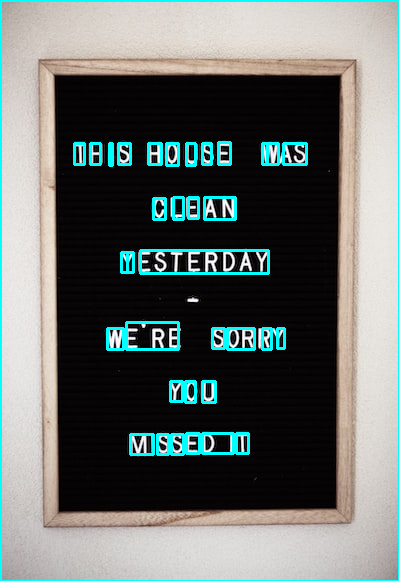

In [16]:
#Add boxes on image
height, width, colors = image.shape
color = (255, 255, 0)
thickness = 2
for box in boxes.splitlines():
  box = box.split(' ')

  start_x = int(box[1])
  start_y = height - int(box[2])
  end_x = int(box[3])
  end_y = height - int(box[4])

  cv2.rectangle(image, (start_x, start_y), (end_x, end_y), color, thickness)

cv2_imshow(image)

In [17]:
cv2.imwrite("LettersOutlined.jpg", image)

True

Improve accuracy with thresholding

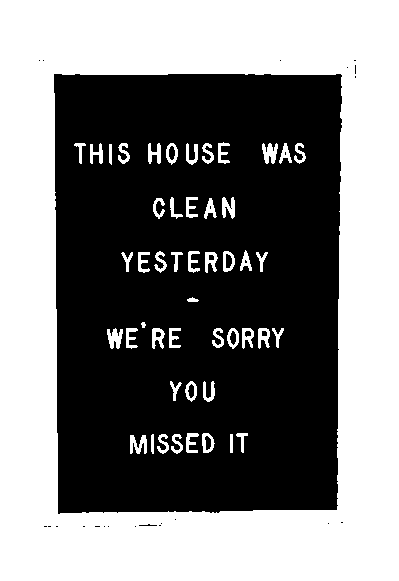

In [23]:
#Threshold image
image = cv2.imread("photo-1553268107-a74f013ceb59?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=399&q=80")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cv2_imshow(threshold)

In [25]:
#Read text in processed image
text = pytesseract.image_to_string(threshold)
print(text)

THIS HOUSE WAS
aay
aa

aad
YOU
PSS

 



In [26]:
#Read text in gray image
text = pytesseract.image_to_string(gray_image)
print(text)

THIS HOUSE WAS
1a Y
AANA

Tae Aad
1)
NSS s me

 



Change perspective of an image with foreign text

In [31]:
!wget "https://cdn.pixabay.com/photo/2016/03/29/18/27/i-am-happy-today-because-i-want-1288941_1280.jpg"

--2022-12-19 18:03:01--  https://cdn.pixabay.com/photo/2016/03/29/18/27/i-am-happy-today-because-i-want-1288941_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.150.12, 104.18.37.244, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.150.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 320614 (313K) [binary/octet-stream]
Saving to: ‘i-am-happy-today-because-i-want-1288941_1280.jpg’

i-am-happy-today-be 100%[===================>] 313.10K  --.-KB/s    in 0.009s  

2022-12-19 18:03:01 (33.6 MB/s) - ‘i-am-happy-today-because-i-want-1288941_1280.jpg’ saved [320614/320614]



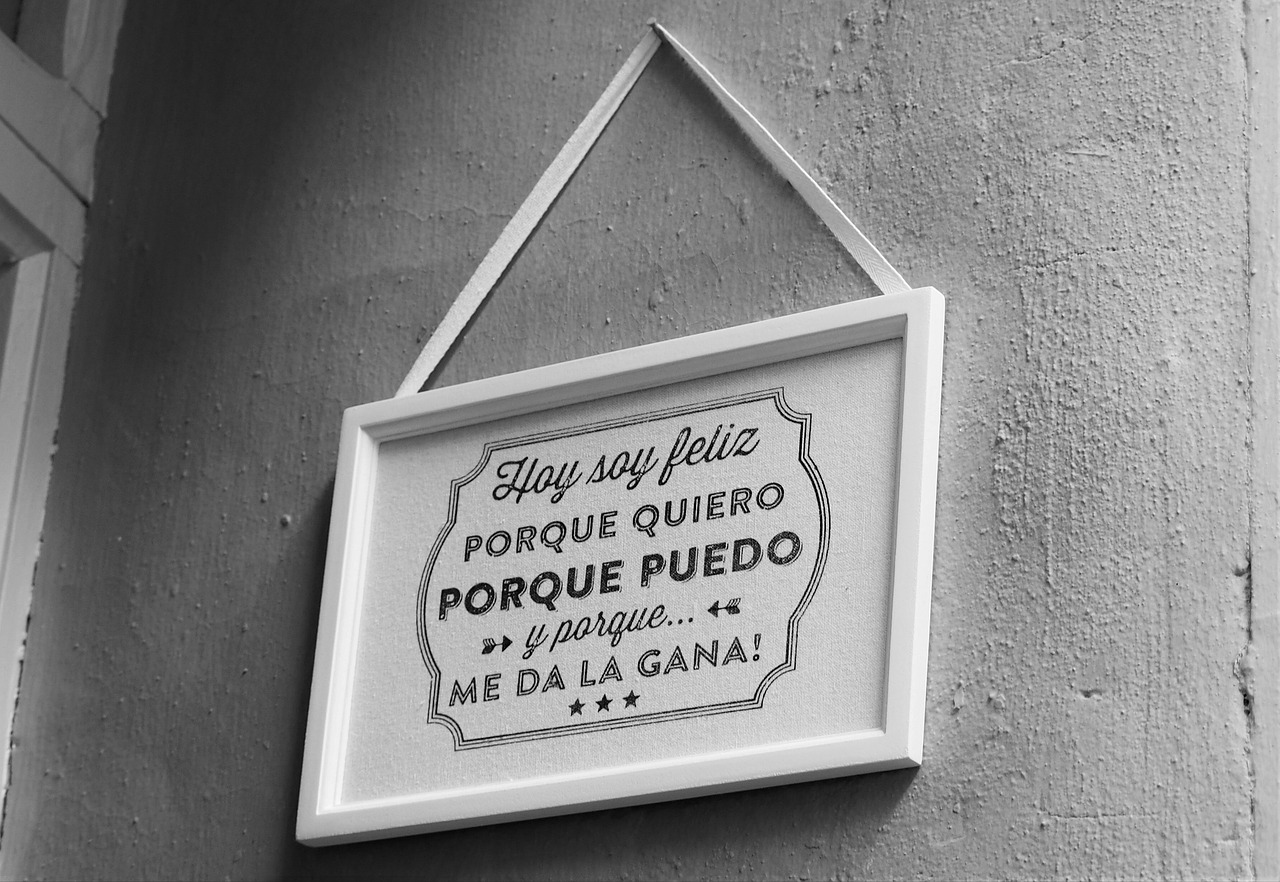

In [32]:
image = cv2.imread("i-am-happy-today-because-i-want-1288941_1280.jpg")

cv2_imshow(image)

In [33]:
#try to extract text
text = pytesseract.image_to_string(image)
print(text)

 

=< gee




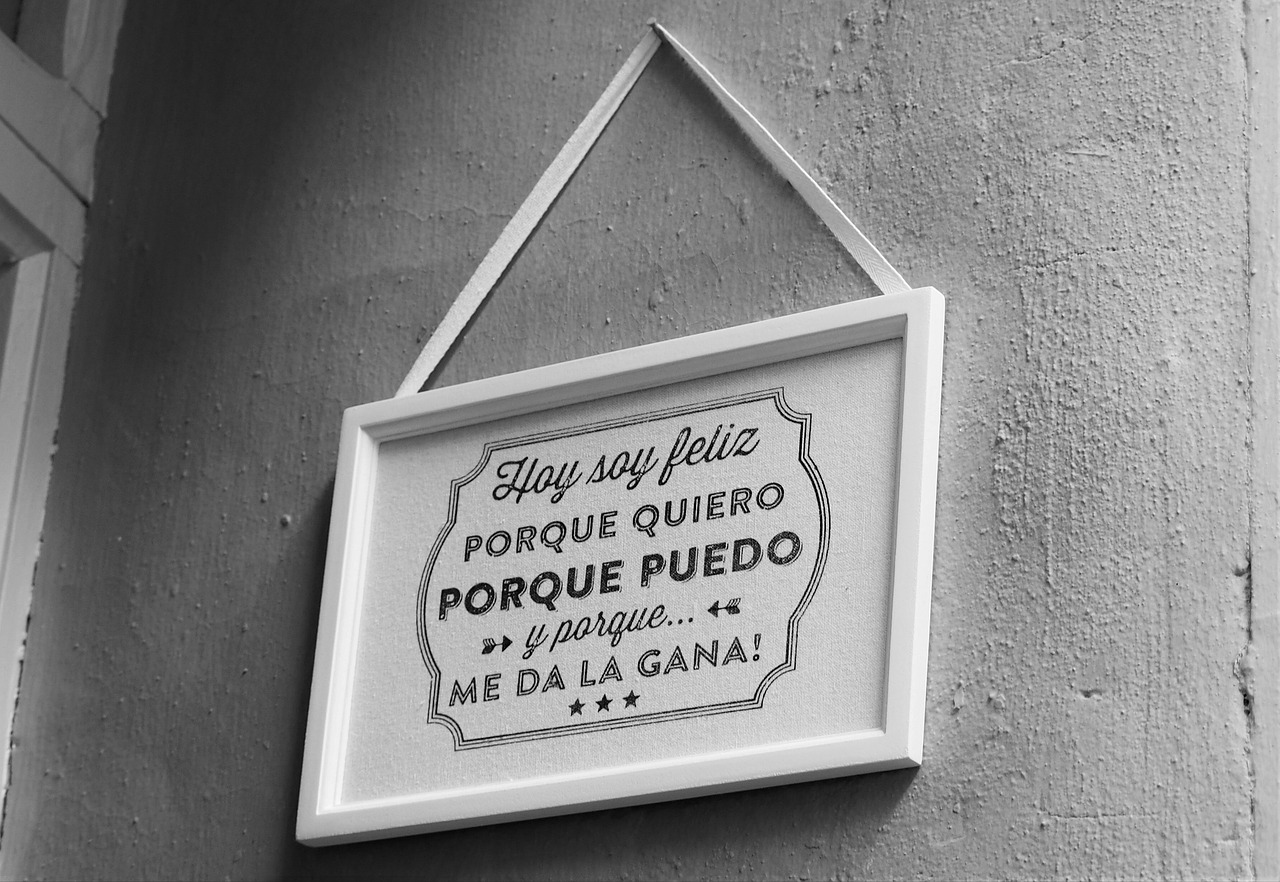

In [36]:
#display image with coordinate 
figure = express.imshow(image)
figure.show()

In [39]:
#select frame in image
topleft = [340, 400]
bottomleft = [300, 840]
bottomright = [920, 760]
topright = [945, 290]

height_1and2 = numpy.sqrt(((topleft[0] - bottomleft[0]) ** 2) + ((topleft[1] - bottomleft[1]) ** 2))
height_3and4 = numpy.sqrt(((bottomright[0] - topright[0]) ** 2) + ((bottomright[1] - topright[1]) ** 2))

width_1and4 = numpy.sqrt(((topleft[0] - topright[0]) ** 2) + ((topleft[1] - topright[1]) ** 2))
width_2and3 = numpy.sqrt(((bottomleft[0] - bottomright[0]) ** 2) + ((bottomleft[1] - bottomright[1]) ** 2))

max_height = max(int(height_1and2), int(height_3and4))
max_width = max(int(width_1and4), int(width_2and3))

input_points = numpy.float32([topleft, bottomleft, bottomright, topright])
output_points = numpy.float32([[0, 0],
                              [0, max_height - 1],
                              [max_width - 1, max_height - 1],
                              [max_width - 1, 0]])

#calculate perspective transform matrix
matrix = cv2.getPerspectiveTransform(input_points, output_points)

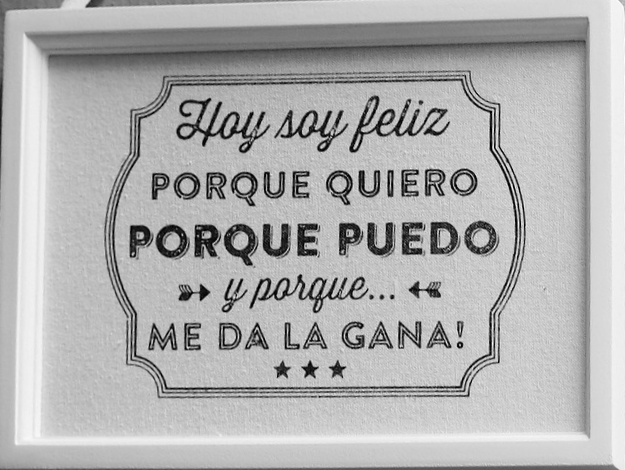

In [40]:
#change perspective
warped_image = cv2.warpPerspective(image, 
                    matrix, 
                    (max_width, max_height), 
                    flags = cv2.INTER_LINEAR)

cv2_imshow(warped_image)

Extract foreign text language from an image

In [43]:
#try to read
text = pytesseract.image_to_string(warped_image)
print(text)

In [44]:
#read spanish
text = pytesseract.image_to_string(warped_image, lang= "spa")
print(text)

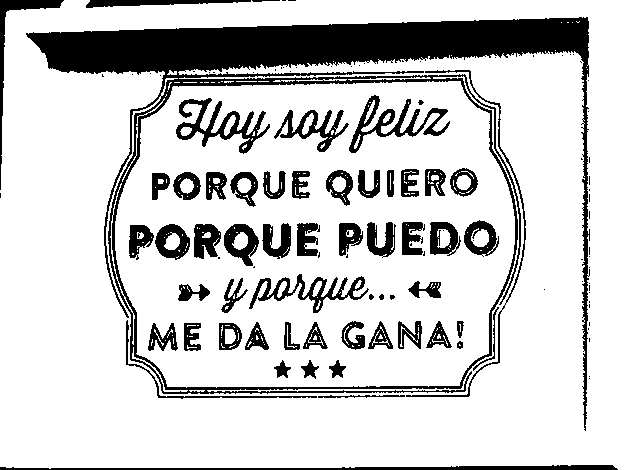

In [46]:
#threshold image
gray_warped_image = cv2.cvtColor(warped_image, cv2.COLOR_BGR2GRAY)

threshold = cv2.threshold(gray_warped_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cv2_imshow(threshold)

In [48]:
#read spanish
text = pytesseract.image_to_string(threshold, lang= "spa")
print(text)

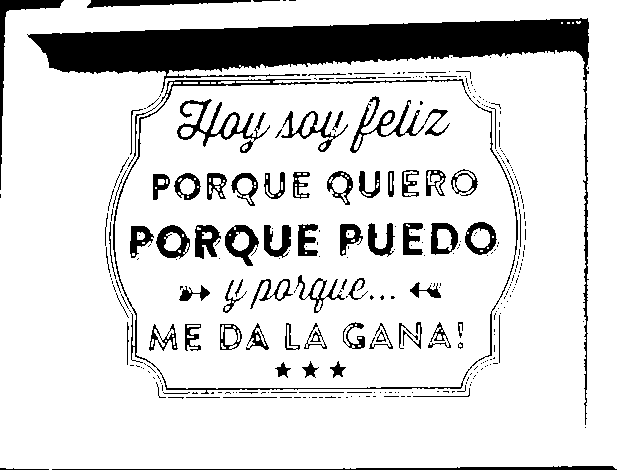

In [50]:
#try dilation
kernel = numpy.ones((2, 2), numpy.uint8)

dilate = cv2.dilate(threshold, kernel, iterations = 1)

cv2_imshow(dilate)

In [51]:
#read spanish
text = pytesseract.image_to_string(dilate, lang= "spa")
print(text)

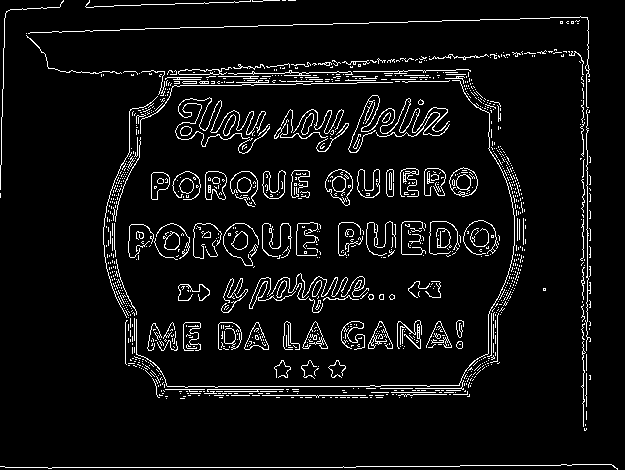

In [52]:
#try edge detection
canny = cv2.Canny(threshold, 100, 200)

cv2_imshow(canny)

In [54]:
#read spanish
text = pytesseract.image_to_string(canny, lang= "spa")
print(text)

¡PORQUE PUEDO |
A Laa PIO aaaa ES j

 

 



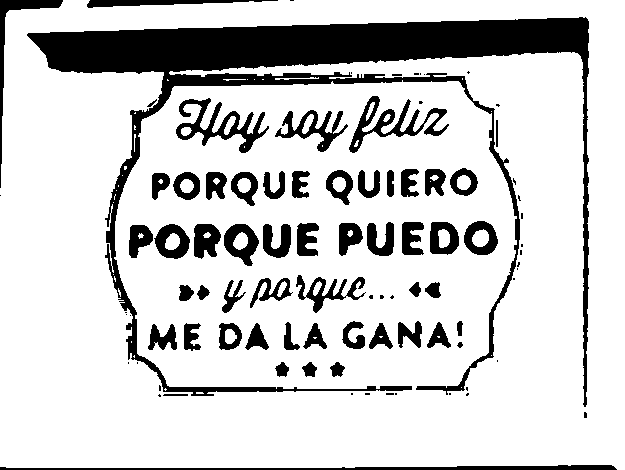

In [55]:
#try to remove noise
remove_noise = cv2.medianBlur(threshold, 5)

cv2_imshow(remove_noise)

In [57]:
#read spanish
text = pytesseract.image_to_string(remove_noise, lang= "spa")
print(text)

 
  
    
   
     
 

  
 
 

"Hoy soy peliz
PORQUE QUIERO |
PORQUE PUEDO |

»> Y NONQUL... 4
ME DA LA GANA!

here

